In [1]:
"""Example program to demonstrate how to send a multi-channel time series to LSL."""
"""Исходящий сигнал"""

import time
from random import random as rand

from pylsl import StreamInfo, StreamOutlet

# first create a new stream info (here we set the name to BioSemi,
# the content-type to EEG, 8 channels, 100 Hz, and float-valued data) The
# last value would be the serial number of the device or some other more or
# less locally unique identifier for the stream as far as available (you
# could also omit it but interrupted connections wouldn't auto-recover)
info = StreamInfo('BioSemi', 'EEG', 1, 500, 'float32', 'CompTech2018,16:40')

# next make an outlet
outlet = StreamOutlet(info)

In [12]:
print("now sending data...")

from random import random as rand
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

# Fixing random state for reproducibility

np.random.seed(int(rand() * 10000))


X = 255 * np.random.rand(6, 8, 3)
X = np.ones((6, 8, 3))
fig, ax = plt.subplots()
ax.imshow(X)

fig.show()

numrows, numcols, _ = X.shape

bit_cur = 0
y_center = numrows / 2.0
x_center = numcols / 2.0

def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)
     
def plt_dynamic(x, y, ax):
    ax.imshow(X, alpha = 0)
    circle2 = plt.Circle((x, y), 5, color='#FFFFE0')
    ax.add_artist(circle2)
    fig.canvas.draw()    


def plt_cassette(x1, x2, y, alpha, ax):
    ax.imshow(X)
    #ax.set_axis_bgcolor("red")
    #ax.set
    r = .4
    CircleBigL = plt.Circle((x1, y), 1.0, color='#000000')
    ax.add_artist(CircleBigL)
    CircleBigL = plt.Circle((x1, y), .6, color='#FFFFE0')
    ax.add_artist(CircleBigL)
    for i in range(6):
        Circle_i = plt.Circle((x1 + r * np.cos(alpha + np.pi * i / 3), y + r * np.sin(alpha + np.pi * i / 3)), .1, color='#000000')
        ax.add_artist(Circle_i)
        CircleBigR = plt.Circle((x2, y), 1.2, color='#000000')
    ax.add_artist(CircleBigR)
    CircleBigR = plt.Circle((x2, y), .6, color='#FFFFE0')
    ax.add_artist(CircleBigR)
    for i in range(6):
        Circle_i = plt.Circle((x2 + r * np.cos(alpha + np.pi * i / 3), y + r * np.sin(alpha + np.pi * i / 3)), .1, color='#000000')
        ax.add_artist(Circle_i)
    plt.plot([2.0, 6.0], [2.0, 1.8], color = '#000000')
    fig.canvas.draw() 
   

alpha = 0

i = 0
while True: 
    i += 1
    if i > 1000:
        break
    if i % 10 == 0:
        print i,
    mysample = [2]
    bit_cur = mysample[0]
    
    alpha += (bit_cur - 1) * 0.1
    #plt_cassette(x_center - 2.0, x_center + 2.0, y_center, alpha, ax)
    #time.sleep(0.1)
    ax.clear()

    outlet.push_sample(mysample)

 now sending data...


<IPython.core.display.Javascript object>

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520

KeyboardInterrupt: 

In [10]:
X

array([[ 27.4879837 ,  34.84429515,  23.03344089, ...,  30.54535035,
         31.16700301,   4.77952045],
       [ 49.77847644,   1.98821472,  48.50422232, ...,  36.02640935,
         22.0176486 ,  12.864375  ],
       [ 27.48416581,  48.80870983,   4.27762172, ...,  47.74435712,
         32.31177872,   8.97853366],
       ..., 
       [ 15.60239071,  15.45028833,  12.96396731, ...,  18.93490698,
         13.44846863,  18.0410676 ],
       [ 31.29473401,  34.1598067 ,  45.470696  , ...,   8.53945819,
          4.60919588,   9.44522301],
       [ 37.60947099,  29.23778448,   0.2115284 , ...,   3.69941677,
          2.8286494 ,  31.18690471]])

In [41]:
outlet.__del__()

NameError: name 'outlet' is not defined

In [1]:
"""Example program to show how to read a multi-channel time series from LSL."""

from pylsl import StreamInlet, resolve_stream

In [8]:
# first resolve an EEG stream on the lab network
print("looking for an EEG stream...")
print resolve_stream()
#streams = resolve_stream('type', 'EEG')
#print streams
streams = resolve_stream()

looking for an EEG stream...
[]


In [13]:
# create a new inlet to read from the stream
inlet = StreamInlet(streams[-2]) # важно найти нужный канал!!!111

In [19]:
import pylsl
print inlet
print inlet.channel_format
print inlet.channel_count 
print inlet.value_type
print inlet.sample_type
inlet.info()

<pylsl.pylsl.StreamInlet instance at 0x7fc7b42204d0>
1
48
<class 'ctypes.c_float'>
<class 'pylsl.pylsl.c_float_Array_48'>


<pylsl.pylsl.StreamInfo instance at 0x7fc78f5ad200>

In [12]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn import decomposition

from scipy.fftpack import fft, ifft

import pandas as pd
import scipy

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

from scipy import signal


RF = joblib.load('random_forest.pkl') 

pca = decomposition.TruncatedSVD(n_components=15)

In [51]:
a = np.random.randint(1,100,(500,30))

for i,s in enumerate(a.T):
    a[:,i] = fil(s)
print a

(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
(500,)
[[-3  2  0 ...,  0 -1  0]
 [-3  2  0 ...,  0 -1 -1]
 [-2  2  0 ...,  0 -1 -1]
 ..., 
 [-4  2  0 ...,  0 -1  0]
 [-3  2  0 ...,  0 -1  0]
 [-3  2  0 ...,  0 -1  0]]


/home/rauf/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: ComplexWarning:

Casting complex values to real discards the imaginary part



In [45]:
def fil(a):
    fft=scipy.fft(a) 
    bp=fft[:]  
    for i in range(len(bp)): 
        if not 7<i<13:
            bp[i]=0

    ibp=scipy.ifft(bp)
    return (ibp.astype(float))

In [41]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

time   = np.linspace(0,10,100)
signal = np.cos(7*np.pi*time)+np.cos(8*np.pi*time)+np.cos(9*np.pi*time)+
np.cos(10*np.pi*time)+np.cos(11*np.pi*time)+np.cos(12*np.pi*time)+np.cos(13*np.pi*time)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<6)] = 0

cut_signal = irfft(cut_f_signal)


print (cut_f_signal)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


<IPython.core.display.Javascript object>


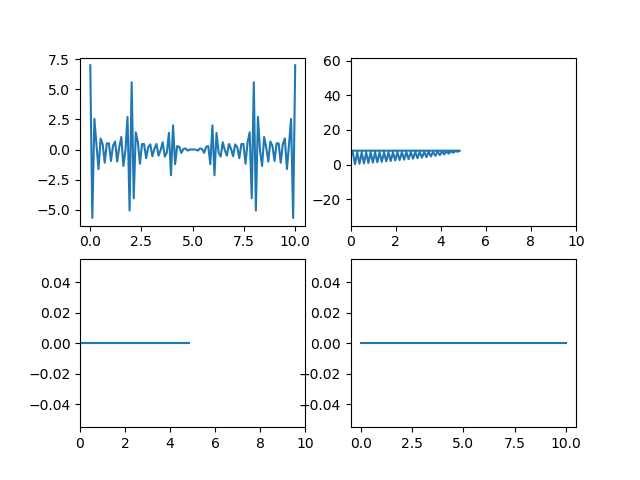

In [47]:
import pylab as plt
plt.subplot(221)
plt.plot(time,signal)
plt.subplot(222)
plt.plot(W,f_signal)
plt.xlim(0,10)
plt.subplot(223)
plt.plot(W,cut_f_signal)
plt.xlim(0,10)
plt.subplot(224)
plt.plot(time,cut_signal)
plt.show()

In [46]:


bad_channels = [7, 11, 12, 17, 19, 22, 24, 28, 30, 31, 33, 34, 35, 40, 41, 42, 43, 44, 45, 46, 47]

i = 0
samples = []
while True:
    i += 1
    #samples = [[0 for i in range(51)] for j in range(500)]
    # get a new sample (you can also omit the timestamp part if you're not
    # interested in it)
    
    sample, timestamp = inlet.pull_sample()
    #sample = np.array(sample+sample[0:3])
    sample += sample[0:3]
    #print (sample.shape, samples.shape)
    samples += [sample]

    #mysample = [i * i % 10]
    #outlet.push_sample(mysample)
    if i % 500 == 0:
        #print samples
        samples = np.array(samples)
        to_del = np.array(bad_channels)
        samples = np.delete(samples, to_del, 1)
        for i,s in enumerate(samples.T):
            samples[:,i] = fil(s)
        to_pred = pca.fit_transform(samples.T).reshape(1,-1)
        value = RF.predict(to_pred)
        samples = []
        print value[0] 

NameError: name 'inlet' is not defined

In [ ]:
print sample

In [96]:
bit_cur = 1
y_delta = 0

In [2]:
plt.clf()

<IPython.core.display.Javascript object>


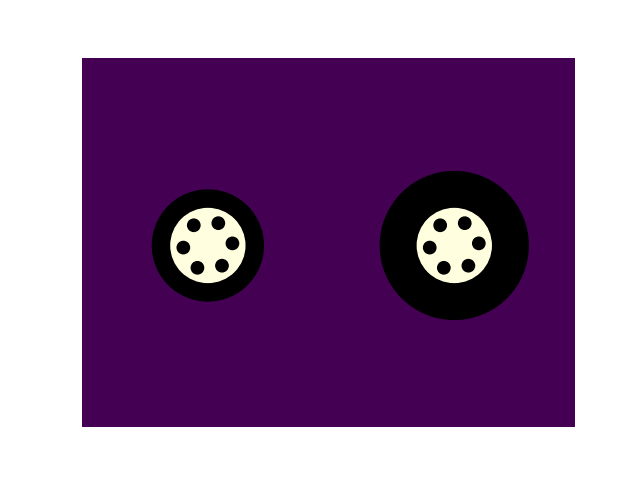

KeyboardInterrupt: 

In [22]:
from random import random as rand
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

# Fixing random state for reproducibility

#np.random.seed(int(rand() * 100000))

X = 0 * np.random.rand(60, 80)
fig, ax = plt.subplots()
#ax.imshow(X)

fig.show()

numrows, numcols = X.shape

bit_cur = 0
y_center = numrows / 2.0
x_center = numcols / 2.0

numrows, numcols = X.shape

def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)
     
def plt_dynamic(x, y, t, ax):
    ax.imshow(X)
    r = 3
    CircleBig = plt.Circle((x, y), 5, color='#FFFFE0')
    ax.add_artist(CircleBig)
    for i in range(6):
        Circle_i = plt.Circle((x + r * np.cos(t + np.pi * i / 3), y + r * np.sin(t + np.pi * i / 3)), 1, color='#000000')
        ax.add_artist(Circle_i)
    fig.canvas.draw()    

    
def plt_cassette(x1, x2, y, alpha, ax):
    ax.imshow(X)
    r = 4
    CircleBigL = plt.Circle((x1, y), 9, color='#000000')
    ax.add_artist(CircleBigL)
    CircleBigL = plt.Circle((x1, y), 6, color='#FFFFE0')
    ax.add_artist(CircleBigL)
    for i in range(6):
        Circle_i = plt.Circle((x1 + r * np.cos(alpha + np.pi * i / 3), y + r * np.sin(alpha + np.pi * i / 3)), 1, color='#000000')
        ax.add_artist(Circle_i)
        CircleBigR = plt.Circle((x2, y), 12, color='#000000')
    ax.add_artist(CircleBigR)
    CircleBigR = plt.Circle((x2, y), 6, color='#FFFFE0')
    ax.add_artist(CircleBigR)
    for i in range(6):
        Circle_i = plt.Circle((x2 + r * np.cos(alpha + np.pi * i / 3), y + r * np.sin(alpha + np.pi * i / 3)), 1, color='#000000')
        ax.add_artist(Circle_i)
    fig.canvas.draw()  
    
for x in range(1000):
    #t = x / 5.0
    #x_center += (2 - 1) * 0.25
    #plt_dynamic(x_center, y_center, t, ax)
    #time.sleep(0.1)
    #ax.clear()
    
    alpha = x / 3.0
    plt_cassette(x_center - 20, x_center + 20, y_center, alpha, ax)
    time.sleep(0.1)
    ax.clear()


#ax.format_coord = format_coord

In [15]:
np.random.rand(2, 3)

array([[ 0.61853658,  0.84793072,  0.37963345],
       [ 0.25966797,  0.52613436,  0.43330746]])

In [17]:
np.ones((2, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

<IPython.core.display.Javascript object>


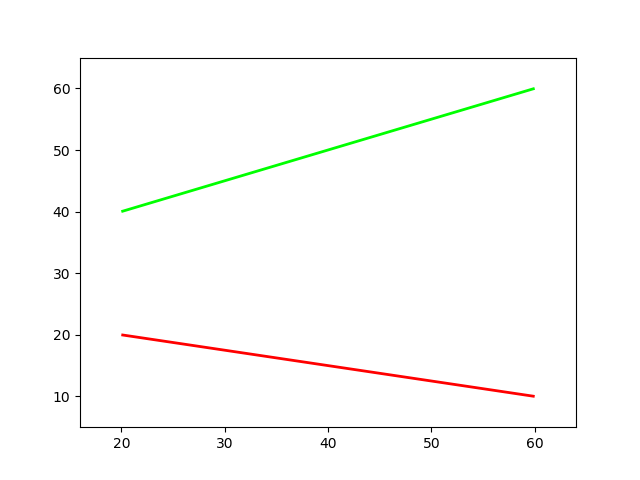

In [32]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(20, 20), (60, 10)], [(20, 40), (60, 60)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [60]:
import bluetooth
host = '7B:34:ED:54' #'00:07:80:41:A6:5E'
port = 2

sock = bluetooth.BluetoothSocket(bluetooth.RFCOMM)
sock.connect((host, port))

data_in = sock.recv()
sock.send(1)

sock.close()

KeyboardInterrupt: 